In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

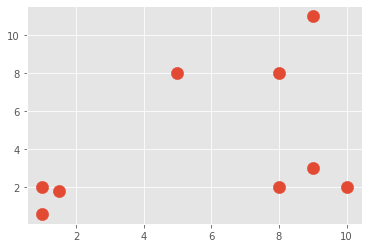

In [2]:
x = np.array([[1, 2],
             [1.5, 1.8],
             [5, 8],
             [8, 8],
             [1, 0.6],
             [9, 11],
             [8,2],
             [10,2],
             [9,3]])

plt.scatter(x[:,0],x[:,1], s=150)
plt.show()

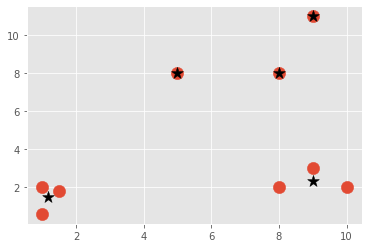

In [10]:
colors=10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=2):
        self.radius = radius
        
    def fit(self, data):
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
            
        while True:
            new_centroids =[]
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)
                        
                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))
            
            uniques = sorted(list(set(new_centroids)))
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
            
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
            
            if optimized:
                break
                
        self.centroids = centroids
        
    def predict(self,data):
        pass
    
clf = Mean_Shift()
clf.fit(x)

centroids = clf.centroids

plt.scatter(x[:, 0], x[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k',marker='*', s=150)
    
plt.show()

# Mean Shift Dynamic Bandwidth

In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

from sklearn.datasets import make_blobs

In [11]:
centers = random.randrange(2,5)
x, y = make_blobs(n_samples=20, centers=3, n_features=2)

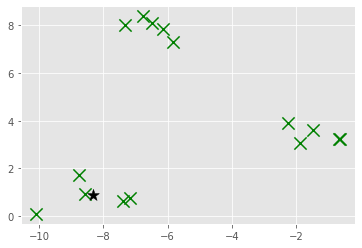

In [14]:
colors=10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=None, radius_norm_step = 100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
        
    def fit(self, data):

        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step

        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        weights = [i for i in range(self.radius_norm_step)][::-1]
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:
                    #if np.linalg.norm(featureset-centroid) < self.radius:
                    #    in_bandwidth.append(featureset)
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1

                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth +=to_add
                    

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii) <= self.radius):
                        to_pop.append(ii)
                        break
                        
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
            
            
           
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
            
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
            
            if optimized:
                break
                
        self.centroids = centroids
        
        self.classifications = {}
        
        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
        
    
    def predict(self,data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
    
clf = Mean_Shift()
clf.fit(x)

centroids = clf.centroids


for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k',marker='*', s=150)
    
plt.show()

In [ ]:
while True:
            new_centroids =[]
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                weights = [i for i in range(self.radius_norm_step)][::-1]
                
                
                for featureset in data:
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.000000001
                    weight_index = int(distance/self.radius)
                    
                    if weight_index > self.radius_norm_step-1:
                        weight = self.radius_norm_step-1
                        
                    
                    to_add = (weights[weight_index]*2)*[featureset]
                    in_bandwidth += to_add
                    
                    
                        
                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))
            
            uniques = sorted(list(set(new_centroids)))
            
            
            to_pop = []
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii) <= self.radius):
                        to_pop.append(ii)
                        break
                        
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
            
            
           
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
            
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
            
            if optimized:
                break
                
        self.centroids = centroids
        
        self.classifications = {}
        
        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
        
    
    def predict(self,data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
            